In [1]:
# -*- coding: utf-8 -*-

# In this script we use a simple classifer called naive bayes and try to predict the violations. 

# 9 Feb 2016
# @author: reyhane_askari
# Universite de Montreal, DIRO

import csv
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
from os import chdir, listdir
from pandas import read_csv
from os import path
from random import randint, sample, seed
from collections import OrderedDict
from pandas import DataFrame, Series
import numpy as np 
import csv
import codecs

%matplotlib inline

colnames = ['old_index','job_id', 'task_idx','sched_cls', 'priority', 'cpu_requested',
            'mem_requested', 'disk', 'violation'] 

tain_path = r'/Users/reyhane.askari/Dropbox/Project_step_by_step/3_create_database/csvs/frull_db_2.csv'

X = pd.read_csv(tain_path, header = None, index_col = False ,names = colnames, skiprows = [0],  usecols = [3,4,5,6,7])
y = pd.read_csv(tain_path, header = None, index_col = False ,names = colnames, skiprows = [0],  usecols = [8])
y = y['violation'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.333, random_state=0)
y_train

array([0, 0, 1, ..., 0, 0, 0])

The scores.mean is : 0.970836


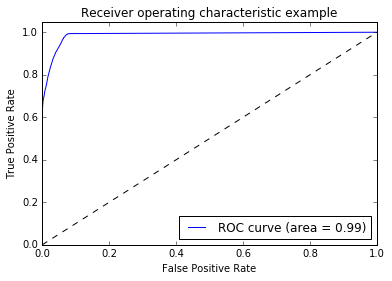

Number of mislabeled points out of a total 67000 points : 1925
The mean accuracy is : 0.971000


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, X_test, y_test)
print("The scores.mean is : %f" %scores.mean())

y_pred = clf.fit(X_train, y_train).predict(X_test)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]


mean_accuracy = clf.fit(X_train, y_train).score(X_test,y_test,sample_weight=None)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.savefig('/Users/reyhane.askari/Dropbox/Project_step_by_step/3_create_database/random_forest.png')
plt.show()
print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0],(y_test != y_pred).sum()))
print("The mean accuracy is : %f" %mean_accuracy)

In [3]:
from sklearn import metrics
metrics.precision_score(y_test, y_pred)

0.93539397010387637

In [4]:
metrics.recall_score(y_test, y_pred)

0.68854904886236479

In [5]:
metrics.f1_score(y_test, y_pred)

0.79321087119991407

In [6]:
 metrics.fbeta_score(y_test, y_pred, beta=0.5)  

0.87281323877068562

In [7]:
 metrics.fbeta_score(y_test, y_pred, beta=1)  

0.79321087119991407

In [8]:
metrics.fbeta_score(y_test, y_pred, beta=2)

0.72691474699744052

In [9]:
metrics.precision_recall_fscore_support(y_test, y_pred, beta=0.5) 

(array([ 0.97351435,  0.93539397]),
 array([ 0.99586294,  0.68854905]),
 array([ 0.97790346,  0.87281324]),
 array([61638,  5362]))